In [1]:
import yfinance as yf 
import os 
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
btc = btc_ticker.history(period = "max")

In [4]:
btc.index = btc.index.strftime("%Y-%m-%d")

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11,69020.546875,72850.710938,67194.882812,72123.906250,65716656765,0.0,0.0
2024-03-12,72125.125000,72825.656250,68728.851562,71481.289062,62554434520,0.0,0.0
2024-03-13,71482.117188,73637.476562,71334.093750,73083.500000,48212536929,0.0,0.0


In [6]:
btc.index = pd.to_datetime(btc.index)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

<Axes: xlabel='Date'>

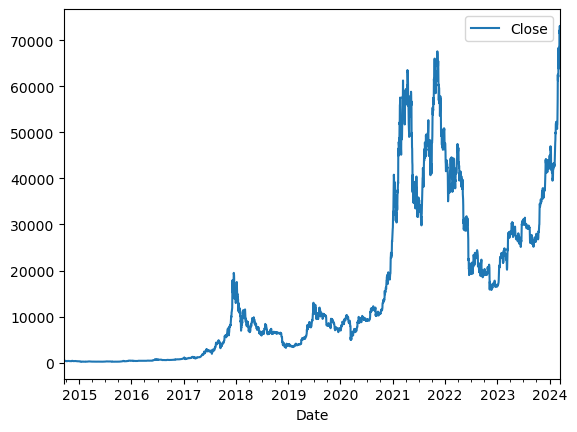

In [8]:
btc.plot.line(y="Close", use_index = True)

In [9]:
wiki = pd.read_csv("Wikipedia_edits.csv", index_col = 0, parse_dates = True)

In [10]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-03-11,1.333333,-0.180856,0.284921
2024-03-12,1.333333,-0.180856,0.284921
2024-03-13,1.333333,-0.180856,0.284921
2024-03-14,1.200000,-0.164037,0.259921


In [11]:
btc = btc.merge(wiki, left_index = True, right_index = True)

In [12]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-03-11,69020.546875,72850.710938,67194.882812,72123.906250,65716656765,1.333333,-0.180856,0.284921
2024-03-12,72125.125000,72825.656250,68728.851562,71481.289062,62554434520,1.333333,-0.180856,0.284921
2024-03-13,71482.117188,73637.476562,71334.093750,73083.500000,48212536929,1.333333,-0.180856,0.284921
2024-03-14,73079.375000,73750.070312,68563.023438,71396.593750,59594605698,1.200000,-0.164037,0.259921


In [13]:
btc["Tomorrow"] = btc["Close"].shift(-1)

In [14]:
btc["Target"] = (btc["Tomorrow"] > btc["Close"]).astype(int)

In [15]:
btc["Target"].value_counts()

Target
1    1840
0    1628
Name: count, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the number of individual decision trees that we want to train
# min_sample_split is that the minimum sample for a node should be 50 in this case, it helps in preventing overfitting 
model = RandomForestClassifier(n_estimators = 100, random_state = 1)

train = btc.iloc[:-200]
test  = btc[-200:]

predictors = ["Close", "Volume", "Open", "High", "Low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(random_state=1)

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
precision_score(test["Target"], preds)

0.47540983606557374

In [18]:
def predict(train, test, predictors, model):
    # Train the model on the training data
    model.fit(train[predictors], train["Target"])
    
    # Make predictions on the test data
    preds = model.predict(test[predictors])
    
    # Convert the predictions to a pandas Series with the same index as the test data
    preds = pd.Series(preds, index=test.index, name="predictions")
    
    # Combine the actual target values and the model's predictions into a DataFrame
    combined = pd.concat([test["Target"], preds], axis=1)
    
    # Return the combined DataFrame
    return combined

In [19]:
def backtest(data, predictors, start=1095, step=150):
    # Initialize an empty list to store predictions from each test set
    all_predictions = []
    
    # Iterate over the dataset in steps
    for i in range(start, data.shape[0], step):
        # Extract the training and test sets based on the current step
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        
        # Make predictions using the provided predict function and model
        predictions = predict(train, test, predictors, model)
        
        # Append the predictions to the list
        all_predictions.append(predictions)
    
    # Concatenate all the predictions into a single DataFrame
    return pd.concat(all_predictions)


In [20]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, predictors, start=1095, step=150)

In [21]:
predictions["predictions"].value_counts()

predictions
1    1328
0    1045
Name: count, dtype: int64

In [22]:
precision_score(predictions["Target"], predictions["predictions"])

0.5052710843373494

In [23]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["Close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["Close"] / rolling_averages["Close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["Target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors


In [24]:
btc, new_predictors = compute_rolling(btc.copy())

In [25]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,Tomorrow,Target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,69020.546875,72850.710938,67194.882812,72123.906250,65716656765,1.333333,-0.180856,0.284921,71481.289062,0,...,1.0,1.063380,1.333333,0.857143,1.436122,0.665556,0.633333,2.106516,1.925388,0.520548
2024-03-12,72125.125000,72825.656250,68728.851562,71481.289062,62554434520,1.333333,-0.180856,0.284921,73083.500000,1,...,0.5,1.037128,1.333333,0.857143,1.409931,0.680556,0.633333,2.079878,1.926849,0.517808
2024-03-13,71482.117188,73637.476562,71334.093750,73083.500000,48212536929,1.333333,-0.180856,0.284921,71396.593750,0,...,0.5,1.045260,1.333333,0.857143,1.427344,0.695556,0.650000,2.118335,1.928311,0.517808
2024-03-14,73079.375000,73750.070312,68563.023438,71396.593750,59594605698,1.200000,-0.164037,0.259921,68211.585938,0,...,0.5,1.011889,1.314286,0.714286,1.381091,0.708333,0.650000,2.061741,1.929406,0.517808


In [26]:
predictions = backtest(btc, new_predictors, start=1095, step=150)

In [27]:
precision_score(predictions["Target"], predictions["predictions"])

0.5246195165622203

In [28]:
predictions

,Target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-03-11,0,0
2024-03-12,1,0
2024-03-13,0,0
2024-03-14,0,0


## Adding Indicators

In [64]:
import ta

In [65]:
btc['sma'] = ta.trend.sma_indicator(btc['Close'], window=20)
btc['rsi'] = ta.momentum.RSIIndicator(btc['Close']).rsi()

In [70]:
from sklearn.preprocessing import MinMaxScaler

btc = btc.sort_index()

# Normalize the values of the indicators
scaler = MinMaxScaler()
btc[['sma', 'rsi']] = scaler.fit_transform(btc[['sma', 'rsi']])
# Normalize other indicators as needed


In [71]:
predictors = ["Close", "Volume", "Open", "High", "Low", "edit_count", "sentiment", "neg_sentiment", "sma", "rsi"]


In [74]:
predictors

['Close',
 'Volume',
 'Open',
 'High',
 'Low',
 'edit_count',
 'sentiment',
 'neg_sentiment',
 'sma',
 'rsi']

In [75]:
# Train and evaluate your model using the updated set of predictors
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])


KeyError: "['sma', 'rsi'] not in index"